# 8 无监督学习

## 8.1 主成分分析

In [1]:
# 使用USArrests数据集进行PCA，数据集的行包括50个州，用字母顺序排列
states=row.names(USArrests)
states

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

In [2]:
# 数据集的列包含4个变量
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

In [3]:
# 变量的均值差异很大
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [4]:
# 变量的方差差异也较大
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

In [5]:
# 所以，在进行PCA之前需要对变量进行标准化处理
# 用prcomp()函数进行主成分分析，默认对变量进行中心化处理，设置scale=TRUE对变量进行标准化处理
pr.out=prcomp(USArrests, scale=TRUE)

In [6]:
# prcomp()函数的输出包含许多可以用作继续分析的量
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [7]:
# center和scale表示在实施PCA之前，进行标准化以后，变量的均值和标准差
pr.out$center
pr.out$scale

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

In [8]:
# rotation矩阵提供了主成分载荷信息，pr.out$rotation的列包含对应的主成分载荷向量
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [9]:
# x矩阵的列就是主成分得分向量，即x矩阵的第k列就是第k个主成分得分向量
dim(pr.out$x)

[1] 50  4

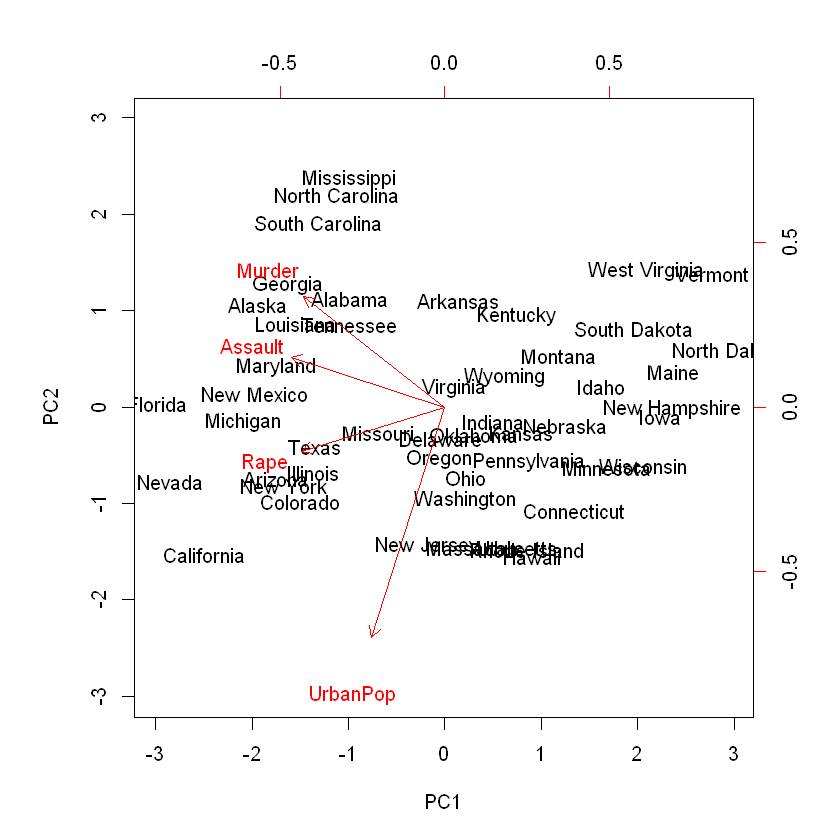

In [10]:
# 绘制前两个主成分的双标图
# scale=0表示载荷箭头所指的变量经过了标准化，使用其他scale值会得到略有不同的双标图，其解释也不一样
biplot(pr.out, scale=0)

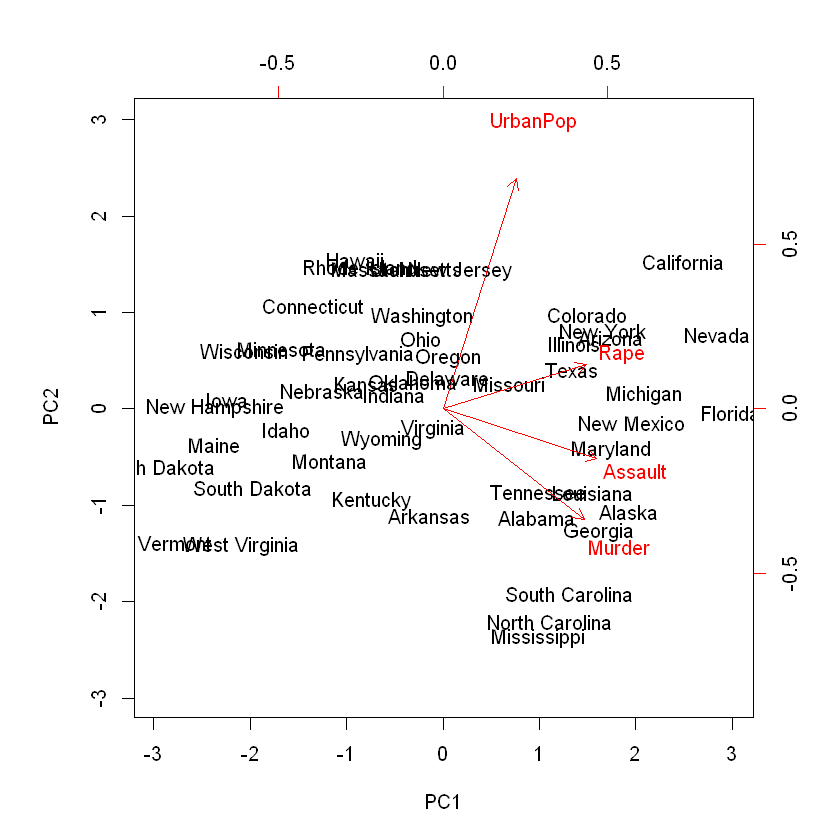

In [11]:
# 主成分在符号可变的意义下唯一
pr.out$rotation=-pr.out$rotation
pr.out$x=-pr.out$x
biplot(pr.out, scale=0)

In [12]:
# 返回每个主成分的标准差和方差
pr.out$sdev
pr.var=pr.out$sdev^2
pr.var

[1] 1.5748783 0.9948694 0.5971291 0.4164494

[1] 2.4802416 0.9897652 0.3565632 0.1734301

In [13]:
# 计算每个主成分的方差解释比例
pve=pr.var/sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

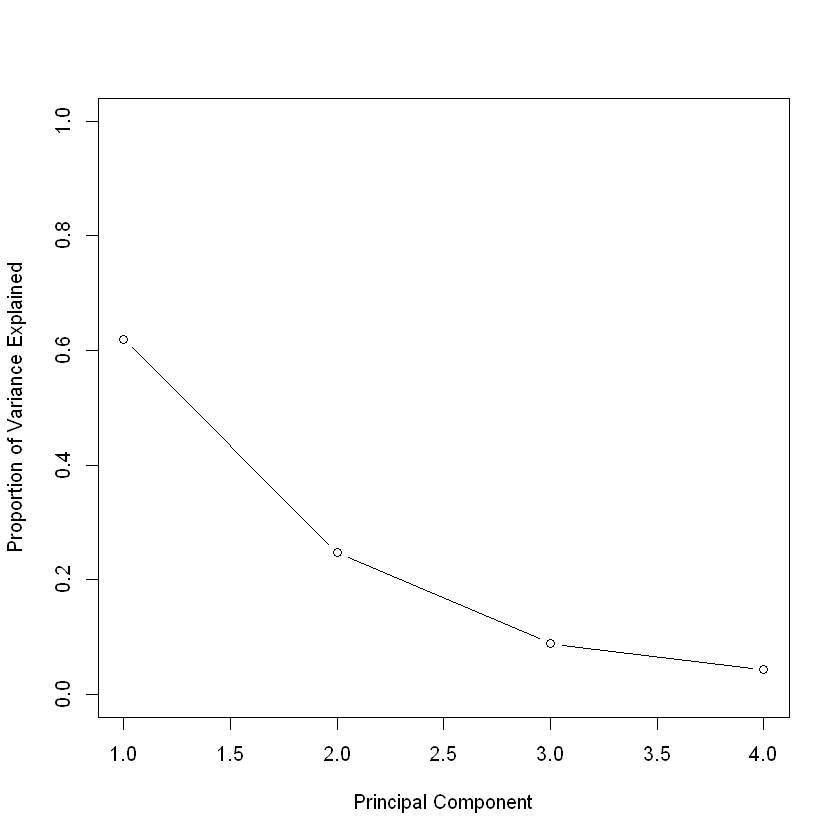

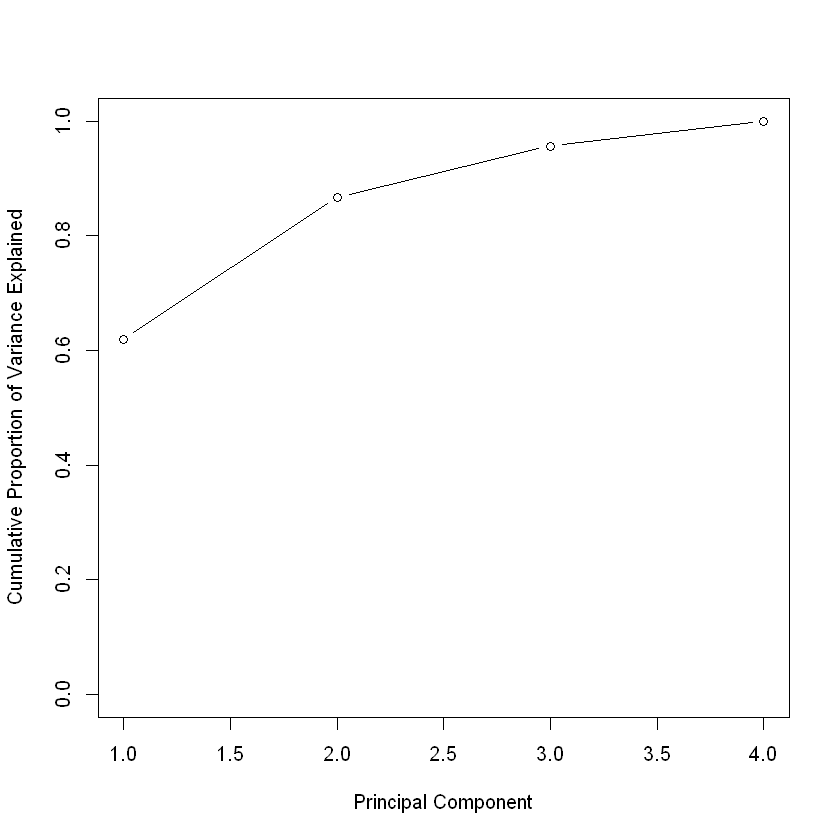

In [14]:
# 绘制每个主成分的PVE和累积PVE图
plot(pve, xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1),type='b')
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", ylim=c(0,1),type='b')

## 8.2 聚类分析

### 8.2.1 K均值聚类

In [15]:
# 创建一个真实类别为2类的数据集，前25个观测相对后25个观测有一个均值漂移
set.seed(2)
x=matrix(rnorm(50*2), ncol=2)
x[1:25,1]=x[1:25,1]+3
x[1:25,2]=x[1:25,2]-4

In [16]:
# 进行K=2的K均值聚类
km.out=kmeans(x,2,nstart=20)

In [17]:
# 返回观测的聚类结果
km.out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

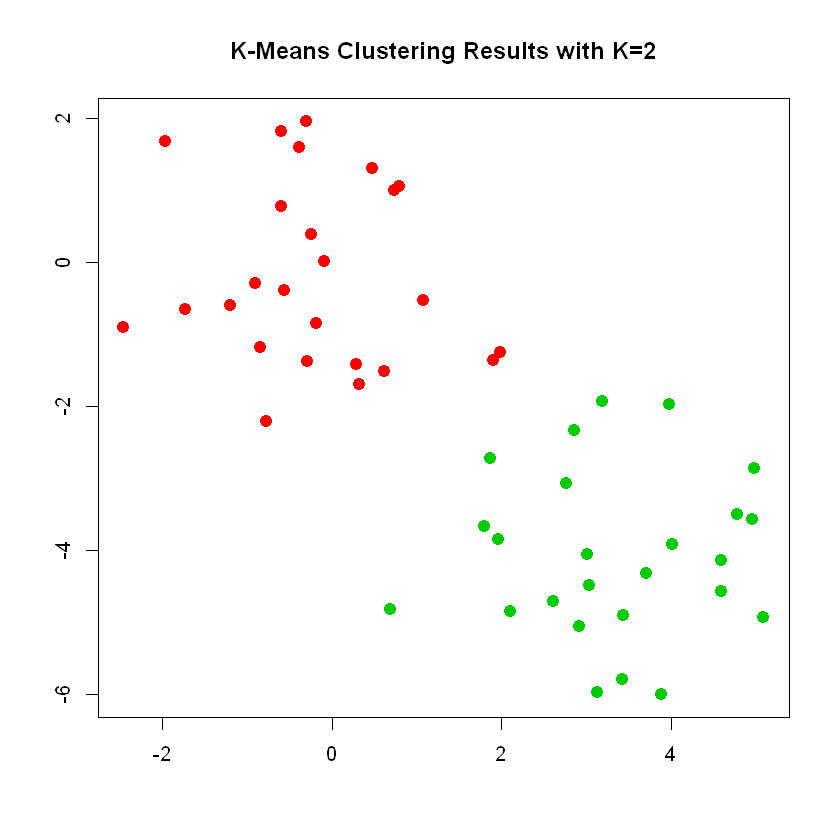

In [18]:
# 根据分类结果对观测着色，绘制包含分类信息的图
# 如果数据是二维的，各个观测的结果易于绘制；如果变量个数多于两个，可以先进行PCA，绘制前2个主成分向量的图
plot(x, col=(km.out$cluster+1), main="K-Means Clustering Results with K=2", xlab="", ylab="", pch=20, cex=2)

In [19]:
# 现实情况下，数据的真实聚类数是未知的，尝试进行K=3的K均值聚类
set.seed(4)
km.out=kmeans(x,3,nstart=20)
km.out

K-means clustering with 3 clusters of sizes 10, 23, 17

Cluster means:
        [,1]        [,2]
1  2.3001545 -2.69622023
2 -0.3820397 -0.08740753
3  3.7789567 -4.56200798

Clustering vector:
 [1] 3 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 3 3 3 3 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 19.56137 52.67700 25.74089
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

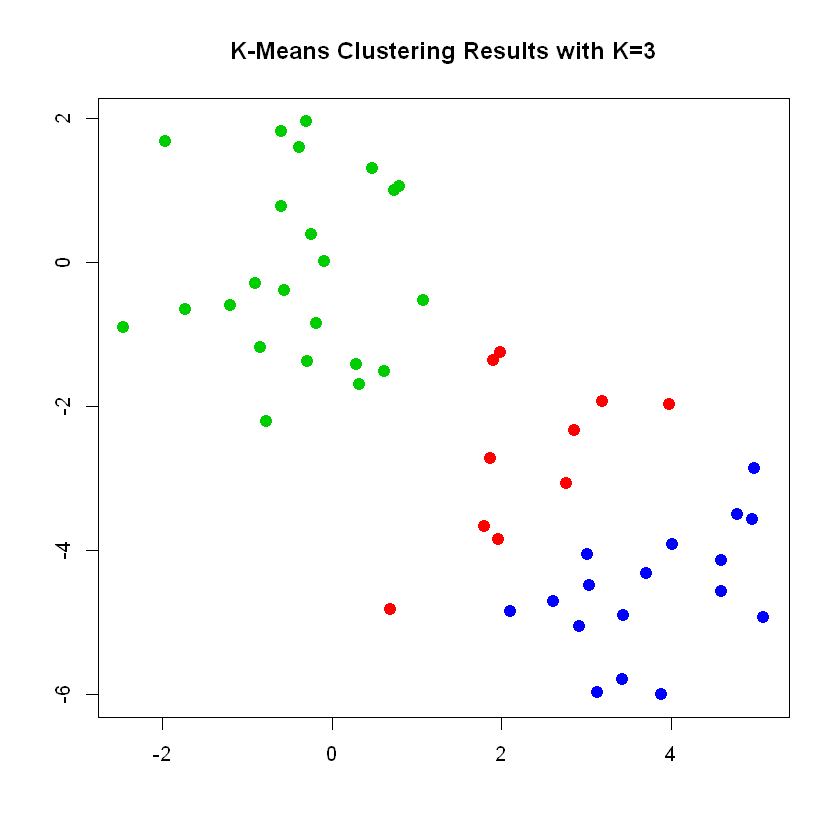

In [20]:
# 当K=3时，K均值聚类将两个类重新拆分
plot(x, col=(km.out$cluster+1), main="K-Means Clustering Results with K=3", xlab="", ylab="", pch=20, cex=2)

In [21]:
# 比较nstart=1和nstart=20的聚类效果，km.out$tot.withiness表示总的类内平方和，每个类的组内平方和保存在km.out$withiness向量中
# 运行K均值聚类时，建议选取一个较大的nstart值，避免产生不理想的局部最优解
# 建议用set.seed()函数产生随机种子，保证K均值聚类的输出结果可以复现
set.seed(3)
km.out=kmeans(x,3,nstart=1)
km.out$tot.withinss

km.out=kmeans(x,3,nstart=20)
km.out$tot.withinss

[1] 104.3319

[1] 97.97927

### 8.2.2 系统聚类法

In [22]:
# 分别用最长距离法、最短距离法、类平均法作为距离方式，用欧氏距离作为相异度指标进行系统聚类
# dist()函数用于计算50*50的观测间欧氏距离矩阵
hc.complete=hclust(dist(x), method="complete")
hc.single=hclust(dist(x), method="single")
hc.average=hclust(dist(x), method="average")

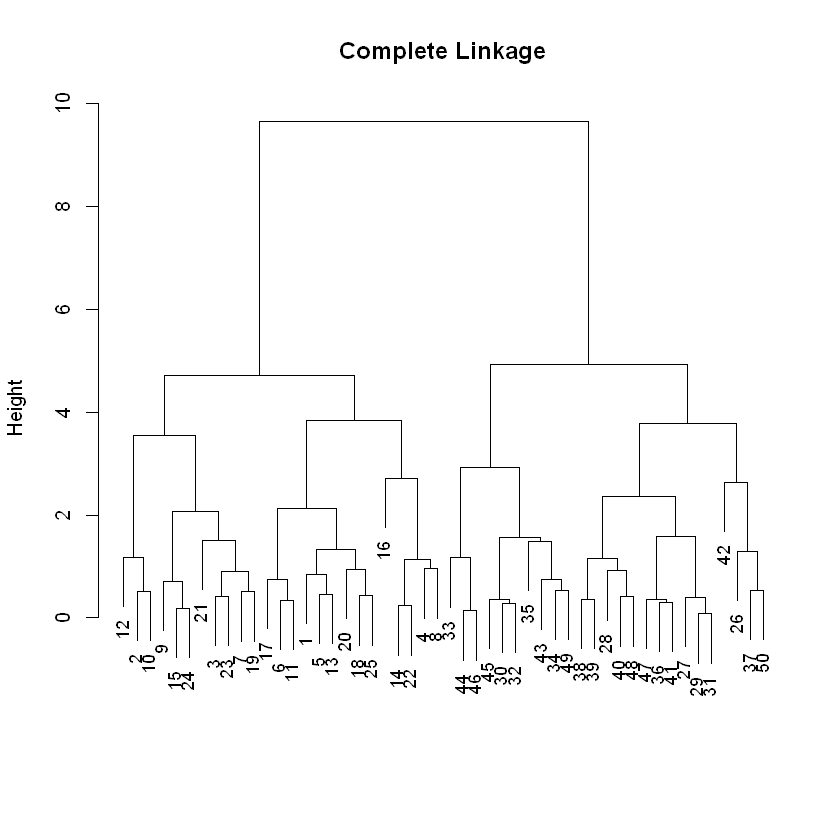

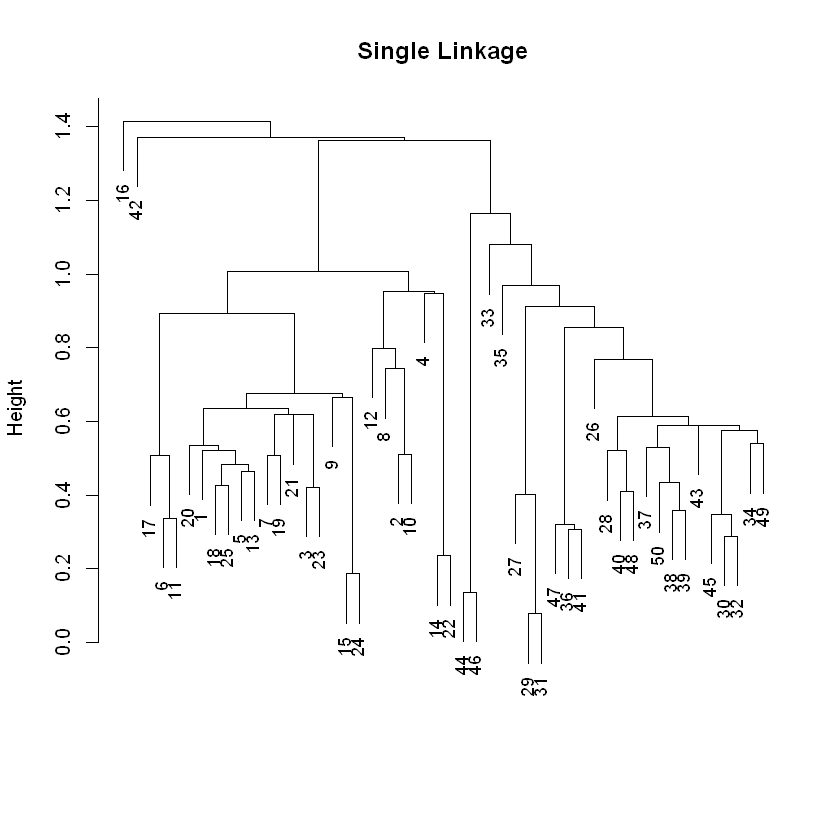

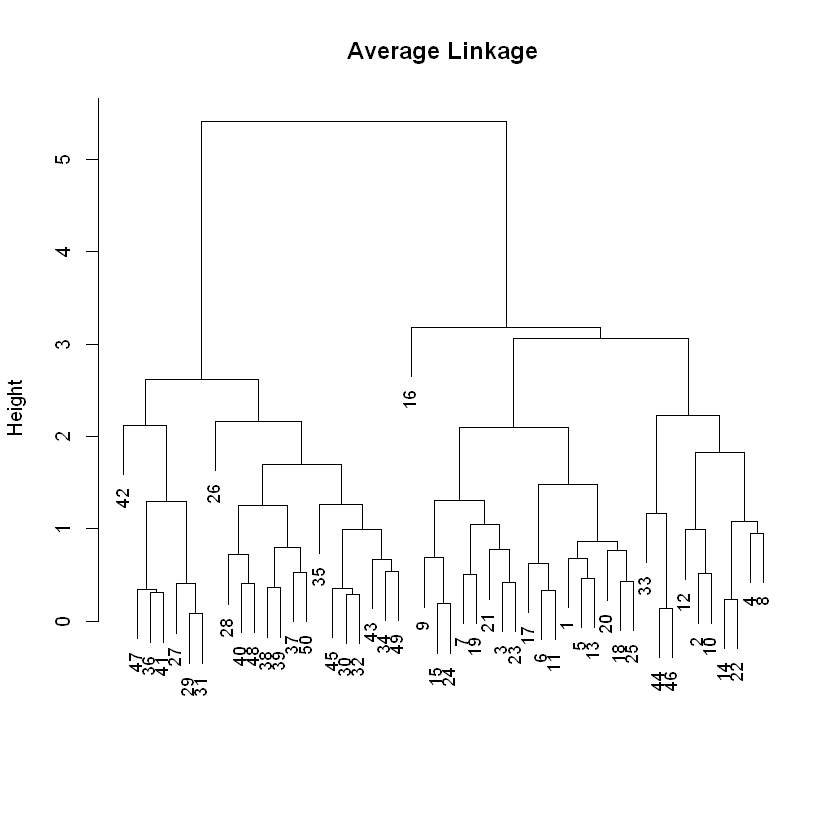

In [23]:
# plot()函数绘制谱系图，谱系图底部的数字代表各个观测
#par(mfrow=c(1,3))
plot(hc.complete,main="Complete Linkage", xlab="", sub="", cex=.9)
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)

In [24]:
# cutree()函数根据谱系图的切割获得各个观测的类标签
# 最长距离法和类平均法都准确地将观测分配到正确的类中
# 最短距离法会有一个点自成一类
cutree(hc.complete, 2)
cutree(hc.single, 2)
cutree(hc.average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

In [25]:
# 用最短距离法将数据划分为4个类，仍然有2个观测自成一类，但得到的聚类结果比聚类数为2时更加合理
cutree(hc.single, 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

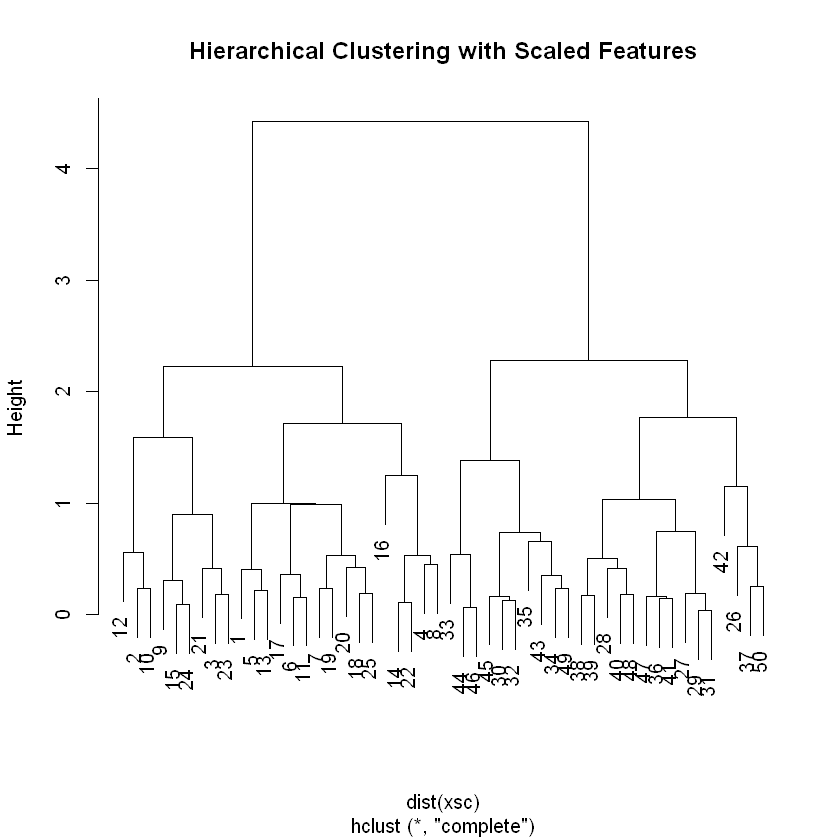

In [26]:
# 在对观测进行系统聚类之前，可以用scale()函数对变量进行标准化处理
xsc=scale(x)
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")

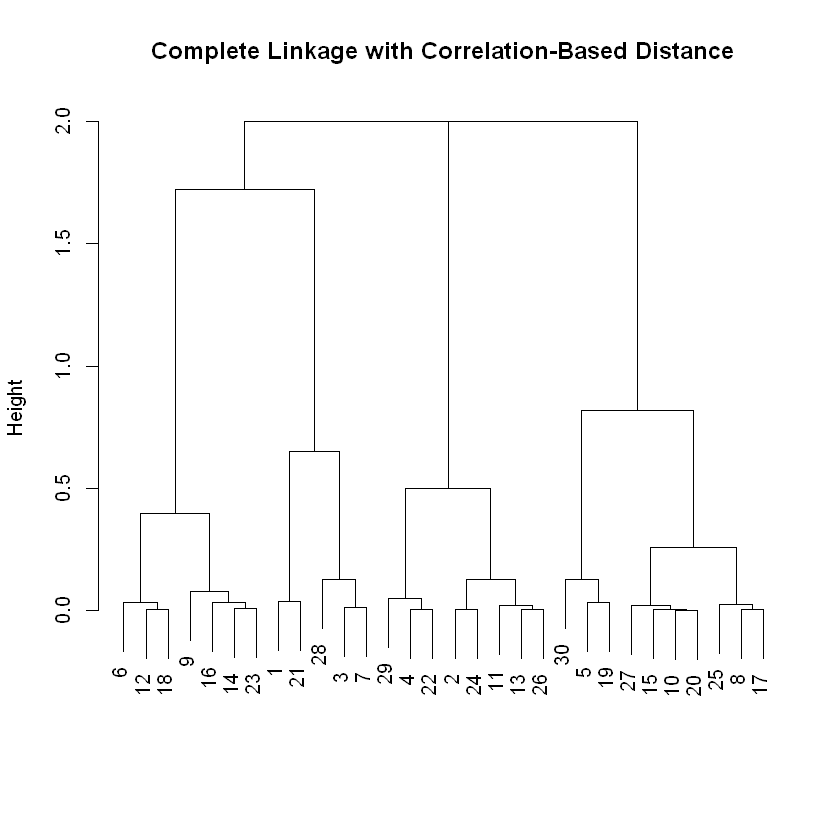

In [27]:
# 可以用as.dist()函数计算基于相关性的距离，将任意一个对称方阵转换成hclust()函数能识别的距离矩阵的形式
# 该方法的前提是数据中至少包含3个变量，因为仅有2个变量的数据，任意2个观测之间的相关系数绝对值恒等于1
# 对三维数据集进行基于相关性距离的系统聚类
x=matrix(rnorm(30*3), ncol=3)
dd=as.dist(1-cor(t(x)))
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-Based Distance", xlab="", sub="")

### 8.2.3 以NCI60数据为例

In [28]:
# NCI60由64个细胞系的6830个基因表达数据构成
library(ISLR)
nci.labs=NCI60$labs
nci.data=NCI60$data

Warning message:
"package 'ISLR' was built under R version 3.3.3"

In [29]:
# 数据集包含64行和6830列
dim(nci.data)

[1]   64 6830

In [30]:
# 癌细胞的类型
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

In [31]:
# 由于高维数据无法可视化，所以进行PCA降维后，绘制前几个主成分得分向量将数据可视化
pr.out=prcomp(nci.data, scale=TRUE)

In [32]:
# 自建函数，根据癌症类型给64个细胞系分配不同颜色
Cols=function(vec){
    cols=rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
  }

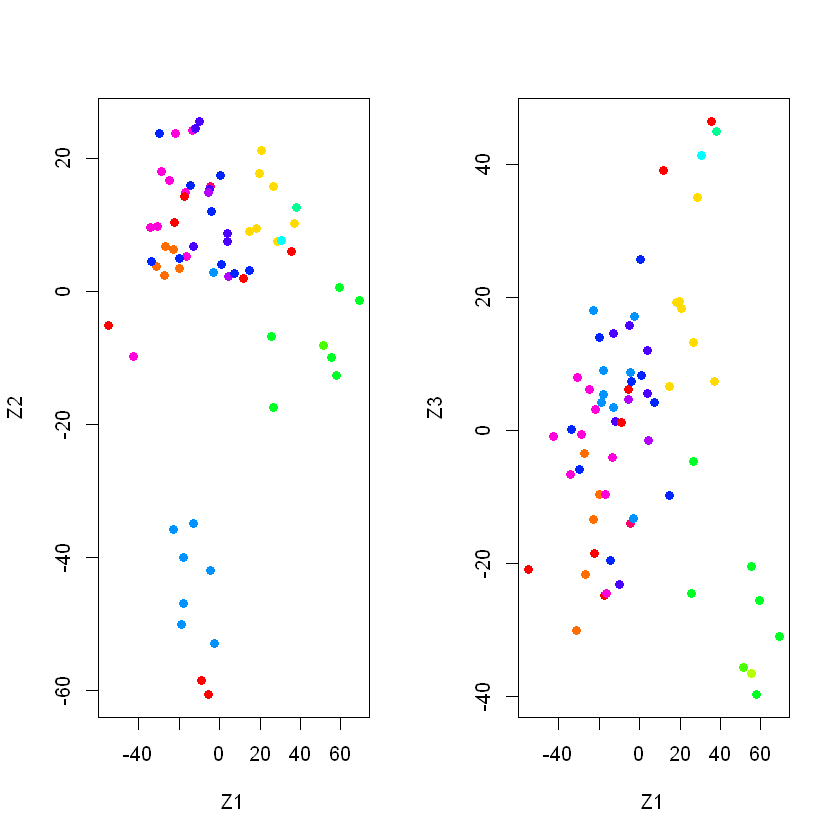

In [33]:
# 同类癌症的细胞系，在前几个主成分得分向量上确实比较接近，说明同类癌症的细胞系有相似的基因表达
par(mfrow=c(1,2))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z2")
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z3")

In [34]:
# summary()函数得到前几个主成分的方差解释比例
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

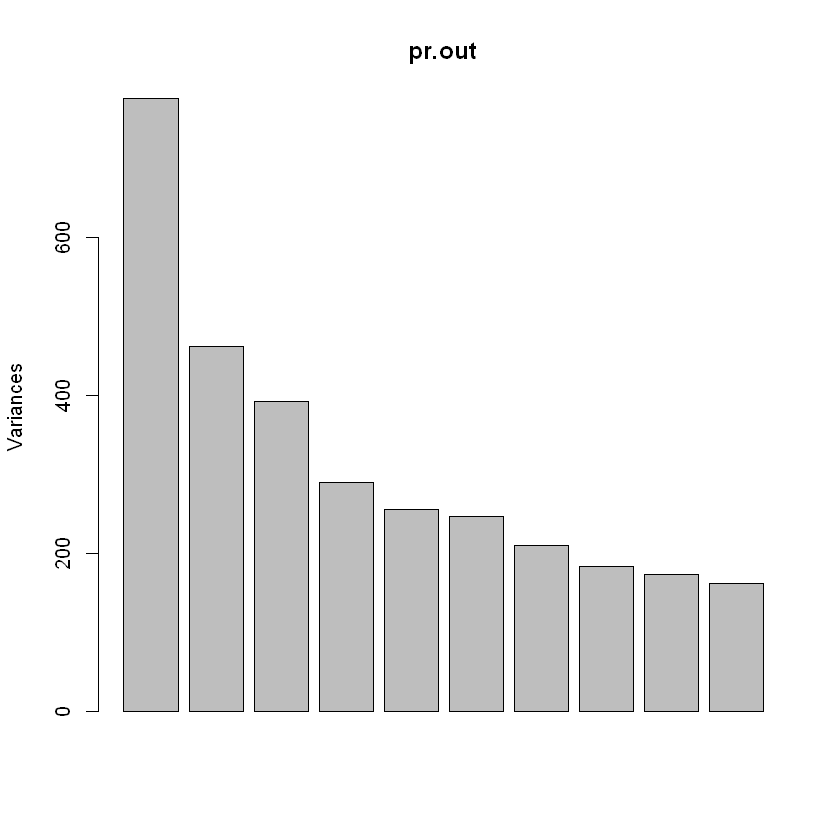

In [35]:
# plot()函数绘制前几个主成分方差的柱状图，柱子的高度是pr.out$sdev（标准差）的平方
plot(pr.out)

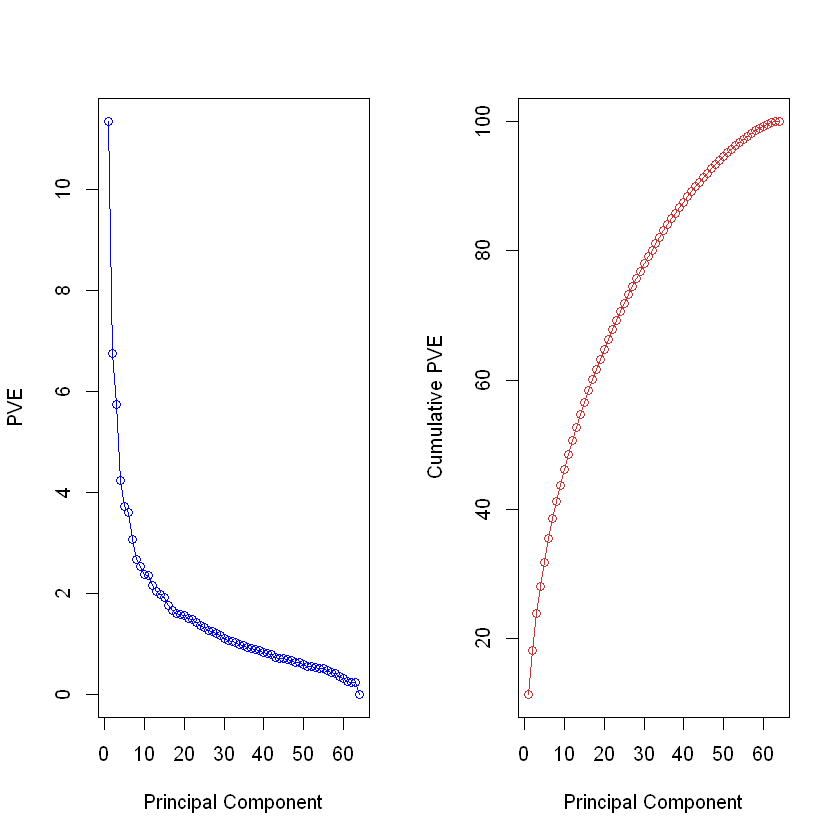

In [36]:
# 绘制每个主成分的PVE和累积PVE图
pve=100*pr.out$sdev^2/sum(pr.out$sdev^2)
par(mfrow=c(1,2))
plot(pve,  type="o", ylab="PVE", xlab="Principal Component", col="blue")
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")

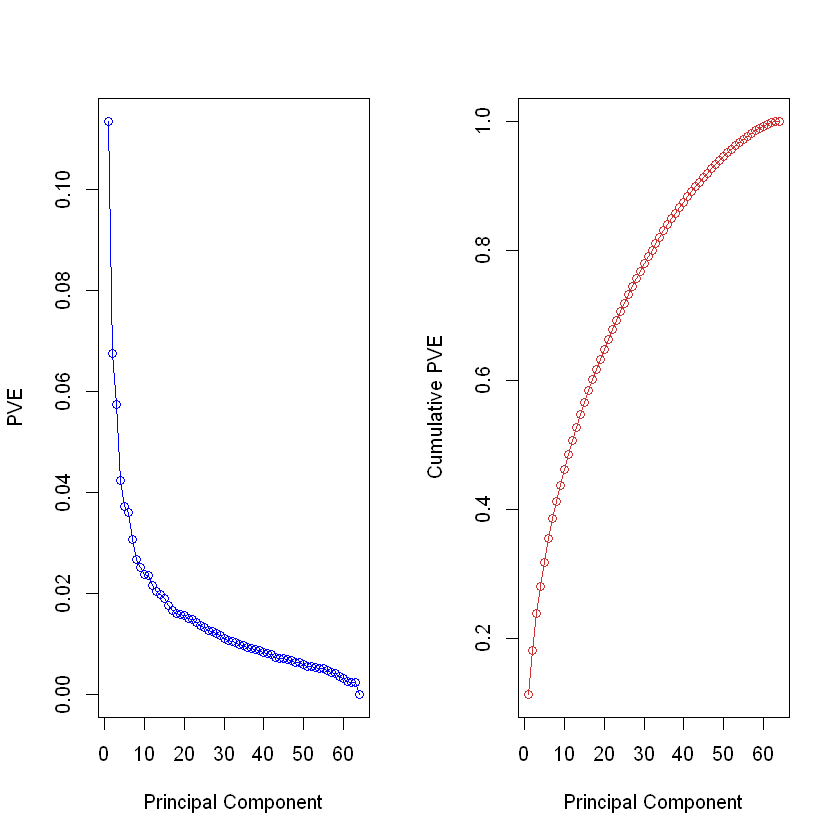

In [37]:
# pve和cumsum(pve)可以由summary(pr.out)$importance[2,]和summary(pr.out)$importance[3,]得到
# 选择前7个主成分（因为碎石图中第7个主成分的位置有一个elbow）
par(mfrow=c(1,2))
plot(summary(pr.out)$importance[2,],  type="o", ylab="PVE", xlab="Principal Component", col="blue")
plot(summary(pr.out)$importance[3,], type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")

In [38]:
# 对NCI60数据集进行系统聚类，检验观测是否被分到了不同的癌症类型中
# 首先对变量进行标准化处理
sd.data=scale(nci.data)

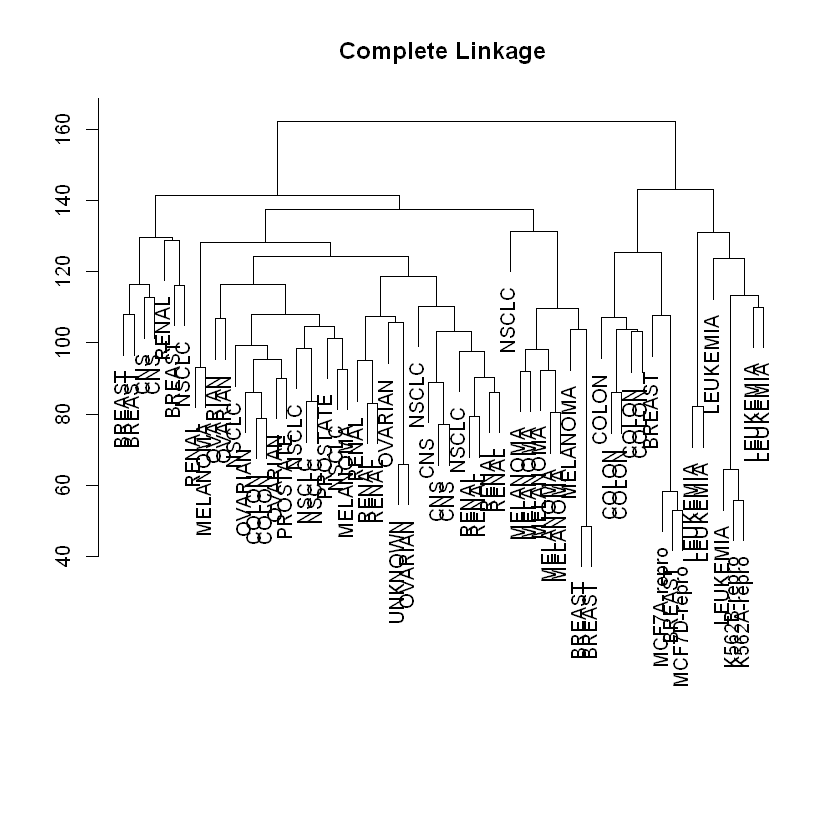

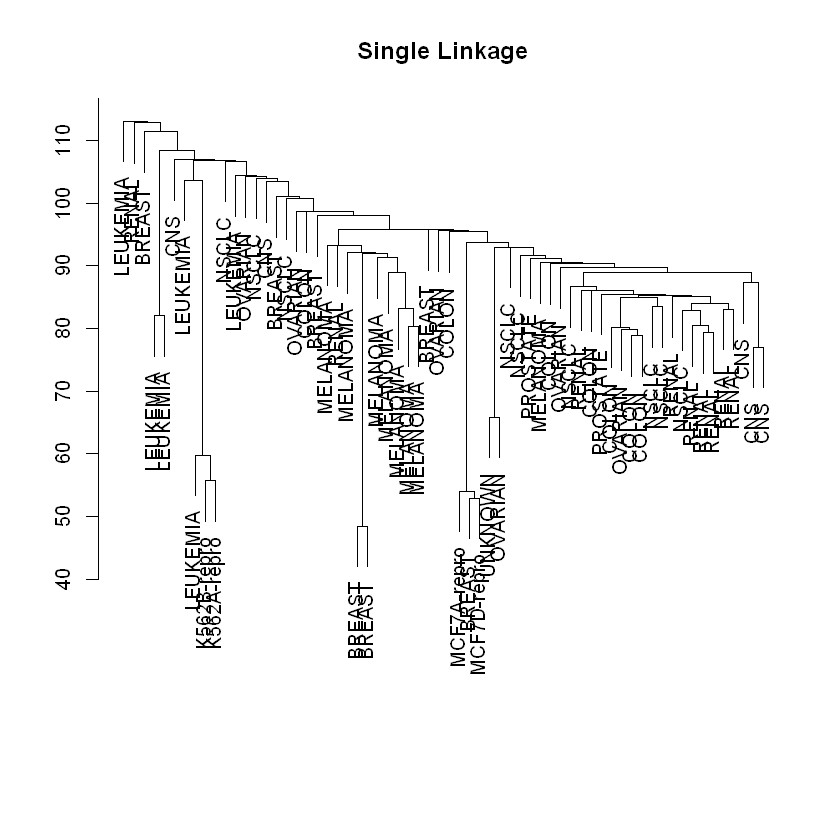

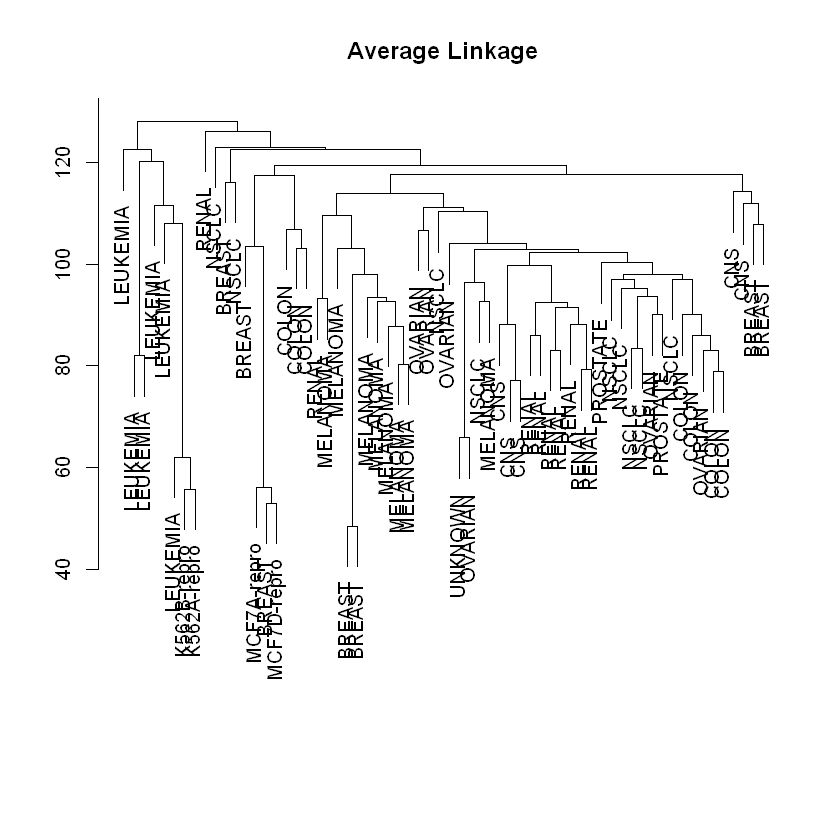

In [39]:
# 分别用最长距离法、最短距离法、类平均法对观测进行系统聚类，用欧氏距离作为相异性度量指标
# 最短距离法倾向于得到拖尾聚类的结果：每个观测一个接一个地聚合到一些非常大的类中
# 最长距离法和类平均法往往会得到类规模相对比较均衡、分析潜力较大的分类结果
# par(mfrow=c(1,3))
data.dist=dist(sd.data)
plot(hclust(data.dist), labels=nci.labs, main="Complete Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="single"), labels=nci.labs,  main="Single Linkage", xlab="", sub="",ylab="")
plot(hclust(data.dist, method="average"), labels=nci.labs, main="Average Linkage", xlab="", sub="",ylab="")

In [40]:
# 对比最长距离法的聚类结果与真实的癌症类型
hc.out=hclust(dist(sd.data))
hc.clusters=cutree(hc.out,4)
table(hc.clusters,nci.labs)

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

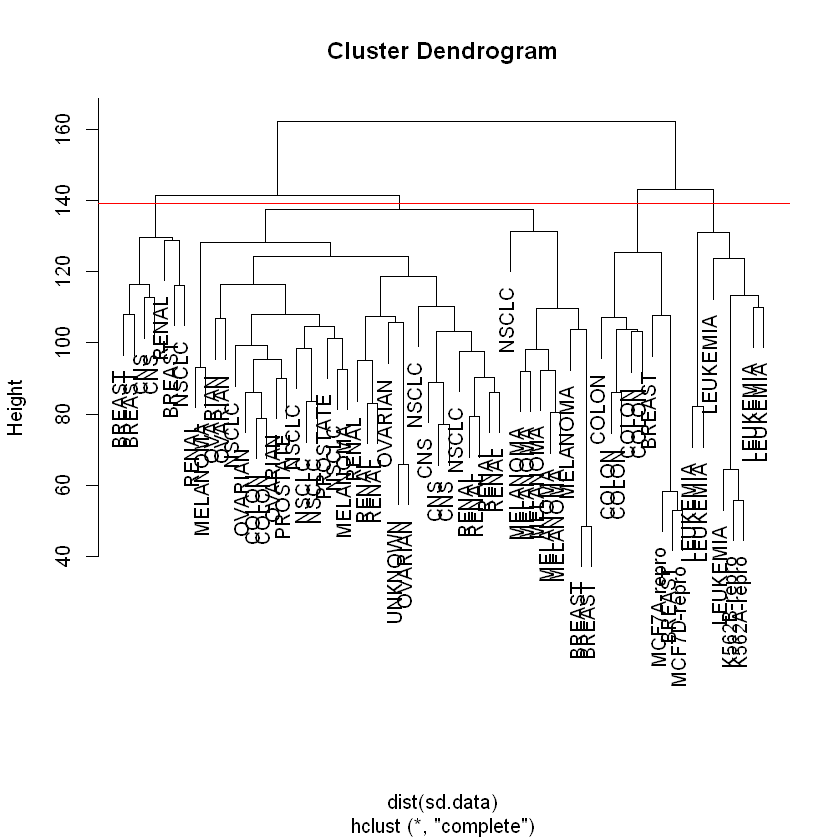

In [41]:
# 从混淆矩阵和系统树图中可以看出一些明显的模式，例如白血病细胞系都被归入了第3类
# par(mfrow=c(1,1))
plot(hc.out, labels=nci.labs)
abline(h=139, col="red")

In [42]:
# 得到hclust的参数概要信息
hc.out


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


In [43]:
# 系统聚类法和K均值聚类法的聚类结果有所不同
set.seed(2)
km.out=kmeans(sd.data, 4, nstart=20)
km.clusters=km.out$cluster
table(km.clusters,hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2  0  0  8  0
          3  9  0  0  0
          4 20  7  0  0

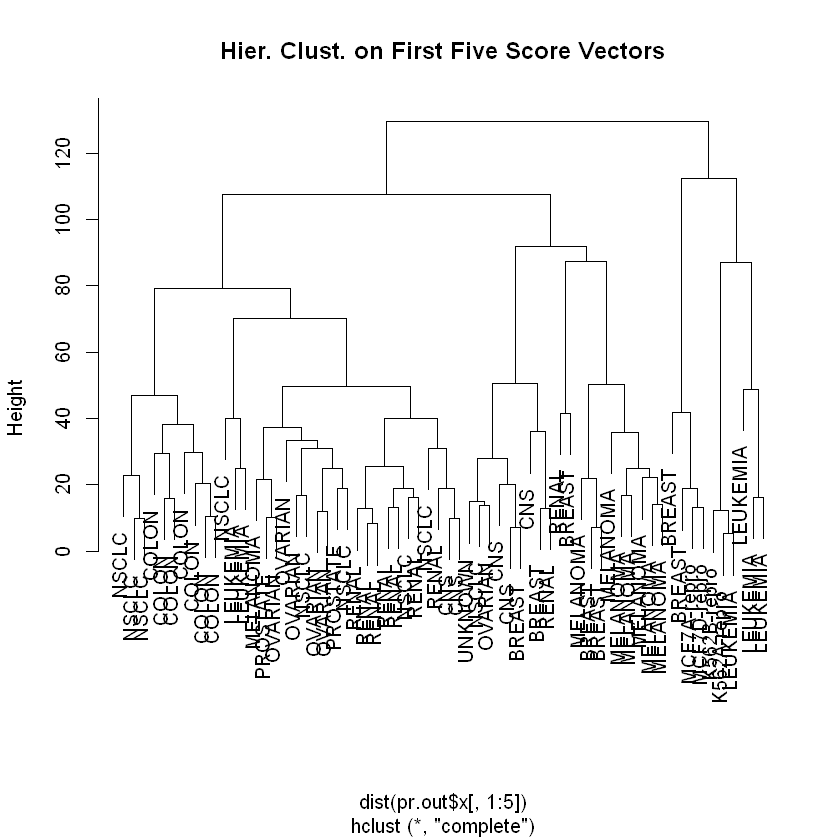

In [44]:
# 对前几个主成分得分向量进行系统聚类，结果与对全部数据做系统聚类有所不同
hc.out=hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main="Hier. Clust. on First Five Score Vectors")

In [45]:
# 有时候用主成分进行系统聚类得到的结果更加理性，可以将得到主成分的过程看作是对数据进行去噪处理
table(cutree(hc.out,4), nci.labs)

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0